In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("play.csv")

In [3]:
df.head()

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes


In [4]:
df.shape

(14, 3)

In [6]:
df.columns

Index(['weather', 'temp', 'play'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   weather  14 non-null     object
 1   temp     14 non-null     object
 2   play     14 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


In [8]:
df.describe()

,weather,temp,play
count,14,14,14
unique,3,3,2
top,Sunny,Mild,Yes
freq,5,6,9


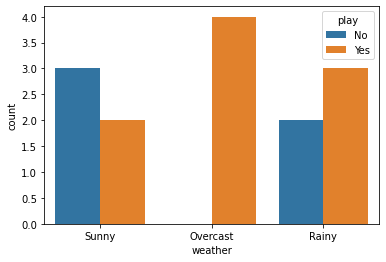

In [10]:
plt.figure()
sns.countplot(data=df, x="weather", hue="play")
plt.show()

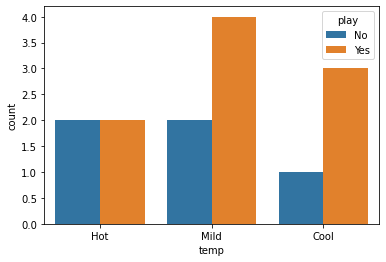

In [11]:
plt.figure()
sns.countplot(data=df, x="temp", hue="play")
plt.show()

In [12]:
X = df.drop("play",axis=1)
y = df["play"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [13]:
for col in X:
    le = LabelEncoder()
    X_train[col]  = le.fit_transform(X_train[col])
    X_test[col]  = le.transform(X_test[col])

In [14]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [15]:
model = GaussianNB()

model.fit(X_train,y_train)

GaussianNB()

In [16]:
# predict on testing

y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [23]:
#for individual result
print("accuracy", accuracy_score(y_test,y_pred))
print("precision", precision_score(y_test,y_pred))
print("recall", recall_score(y_test,y_pred))
print("f1", f1_score(y_test,y_pred))

accuracy 0.8
precision 1.0
recall 0.75
f1 0.8571428571428571


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5

